# Treatment Cost Prediction

Objective:
The goal of this project is to predict individual medical expenses based on various patient attributes using the Insurance dataset. The dataset includes 1338 observations and 7 variables, namely age, body mass index (BMI), number of children covered, smoking status, residential region, and the target variable, medical charges.

In [95]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Wrangling

In [97]:
df.shape

(1338, 7)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [99]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [100]:
df.duplicated().sum()

1

In [101]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [102]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [103]:
# encoding categorical to neumeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['sex'] = le.fit_transform(df['sex'])

In [104]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Exploratory Data Analysis

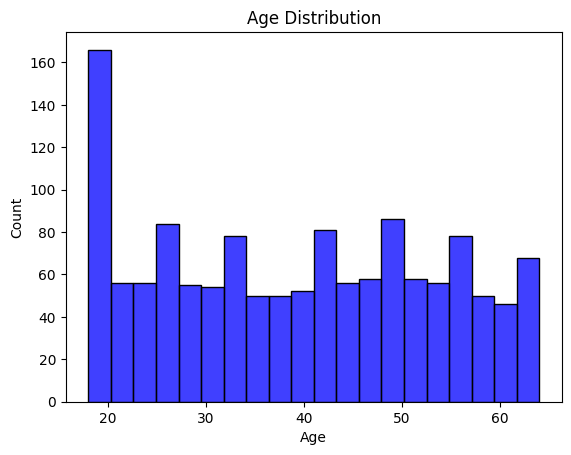

In [105]:
#age distribution
sns.histplot(df.age,bins=20, kde=False,color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

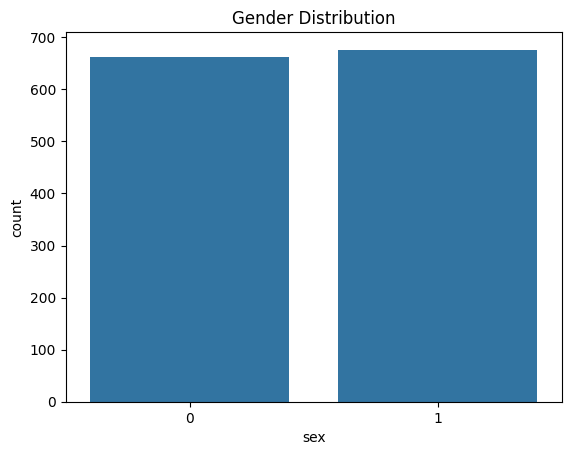

In [106]:
#gender plot
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')

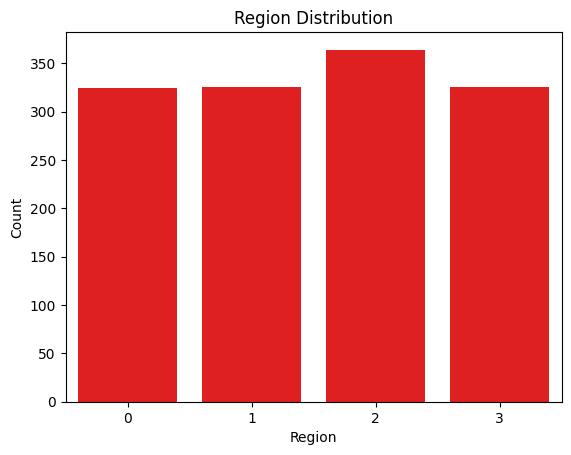

In [107]:
#regionwise plot
sns.countplot(x = 'region', data = df, color = 'red')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

#### Smoker count with gender

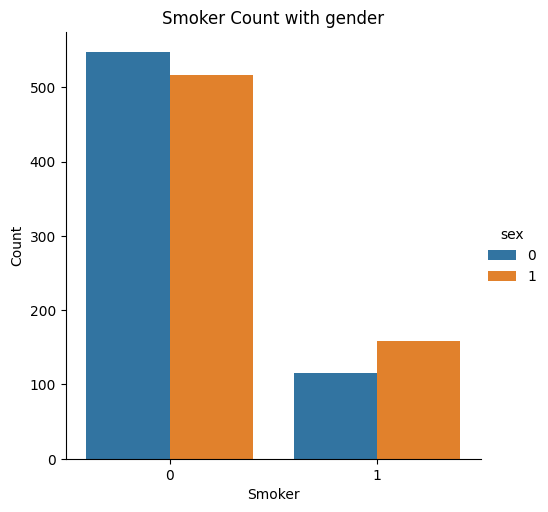

In [108]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

#### Age vs Charges

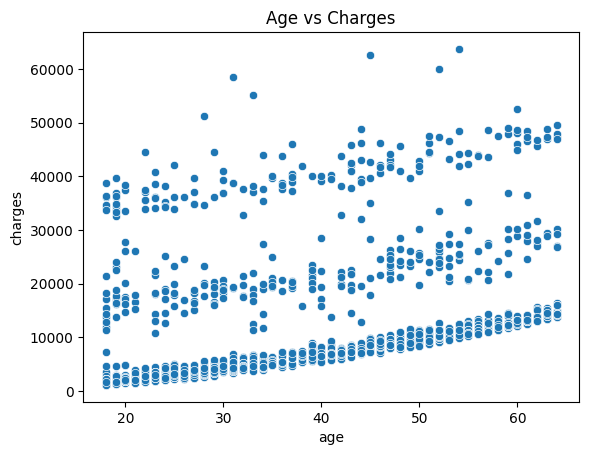

In [109]:
# Scatter plot for age vs charges
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs Charges')
plt.show()

#### Smokers vs non smokers, Charges

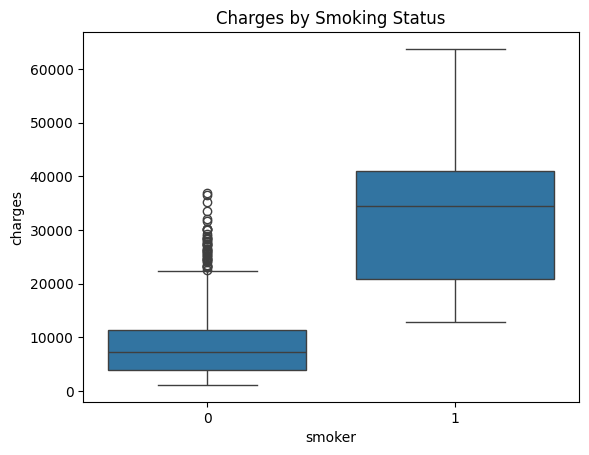

In [110]:
# Box plot for charges by smoker status
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoking Status')
plt.show()

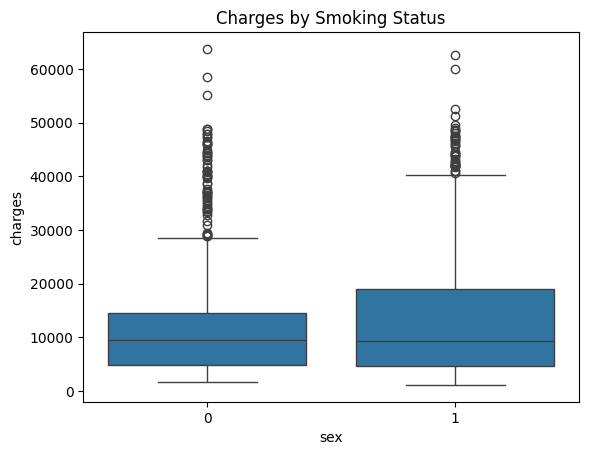

In [111]:
# Box plot for charges by smoker status
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Charges by Smoking Status')
plt.show()

#### women smokers charges

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

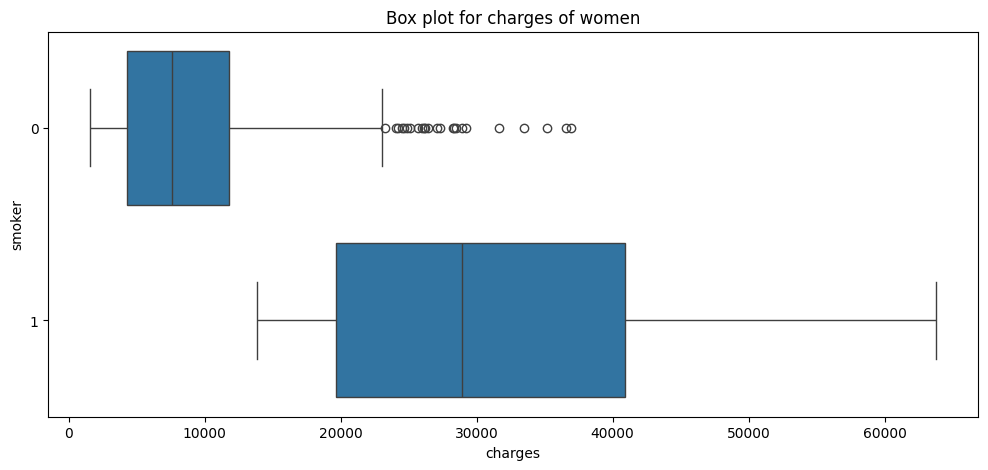

In [112]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h")

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

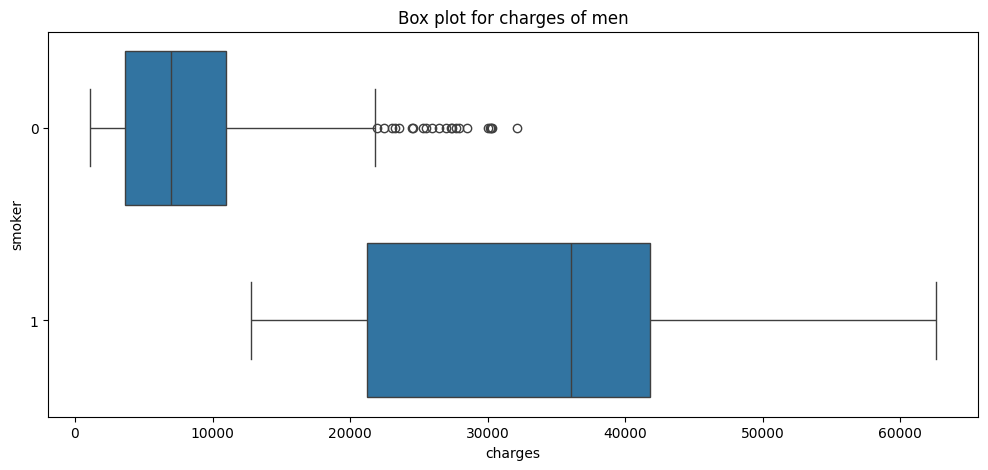

In [113]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h")

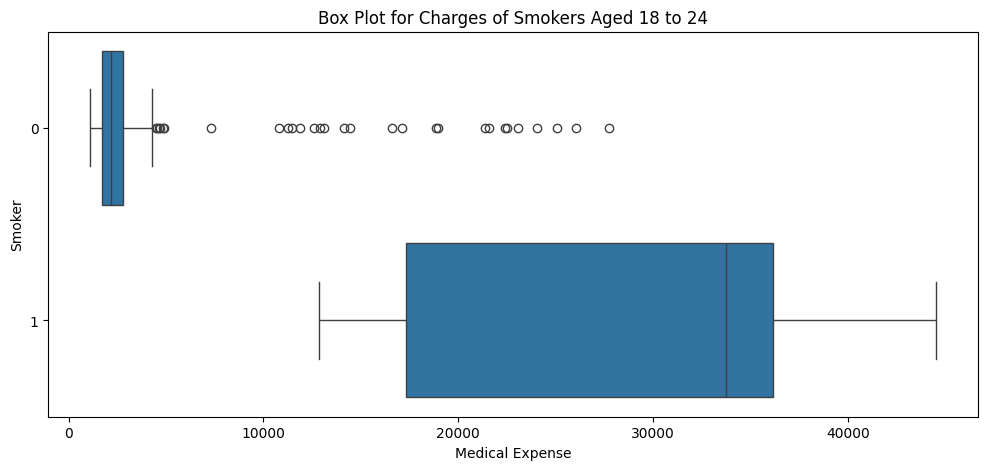

In [114]:
# Filter the data for patients aged between 18 and 24
filtered_df = df[(df['age'] >= 18) & (df['age'] <= 24)]

# Create the box plot
plt.figure(figsize=(12, 5))
plt.title("Box Plot for Charges of Smokers Aged 18 to 24")
sns.boxplot(y="smoker", x="charges", data=filtered_df, orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

### Conclusion

- The data has good balance of distribution in age, gender and region
- The charges are in a steady but not steep inclination with age
- Smokers have much bigger charges than non smokers
- From the data, young men tends to be recorded very less charges compared to smoking individuals

## Model Building

### Linear Regression

In [115]:
X = df.drop('charges', axis=1)
y = df['charges']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Model evaluation
print('Train RMSE:', mean_squared_error(y_train, y_pred_train, squared=False))
print('Test RMSE:', mean_squared_error(y_test, y_pred_test, squared=False))
print('R² Score:', r2_score(y_test, y_pred_test))


Train RMSE: 6105.789320191615
Test RMSE: 5799.587091438356
R² Score: 0.7833463107364539


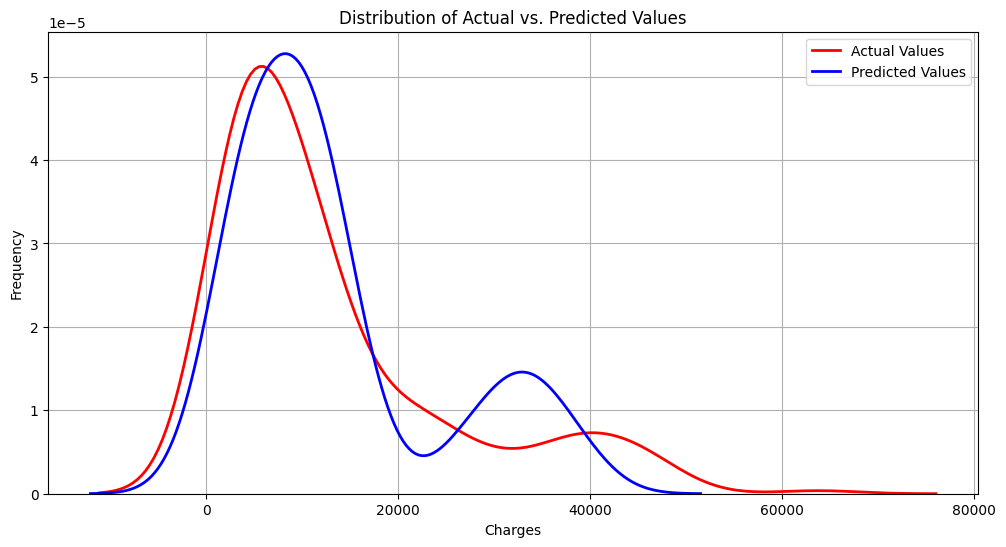

In [118]:
plt.figure(figsize=(12, 6))

# Plotting the KDE of actual values
sns.kdeplot(y_test, color='r', label='Actual Values', linewidth=2)

# Plotting the KDE of predicted values
sns.kdeplot(y_pred_test, color='b', label='Predicted Values', linewidth=2)

# Adding labels and title
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
print(f'Training MSE: {mean_squared_error(y_train, y_pred_train)}')
print(f'Training R^2: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_pred_test)}')
print(f'Test R^2: {r2_score(y_test, y_pred_test)}')

Training MSE: 3708028.280447489
Training R^2: 0.9743093242531877
Test MSE: 21073365.415079337
Test R^2: 0.8642606273649586


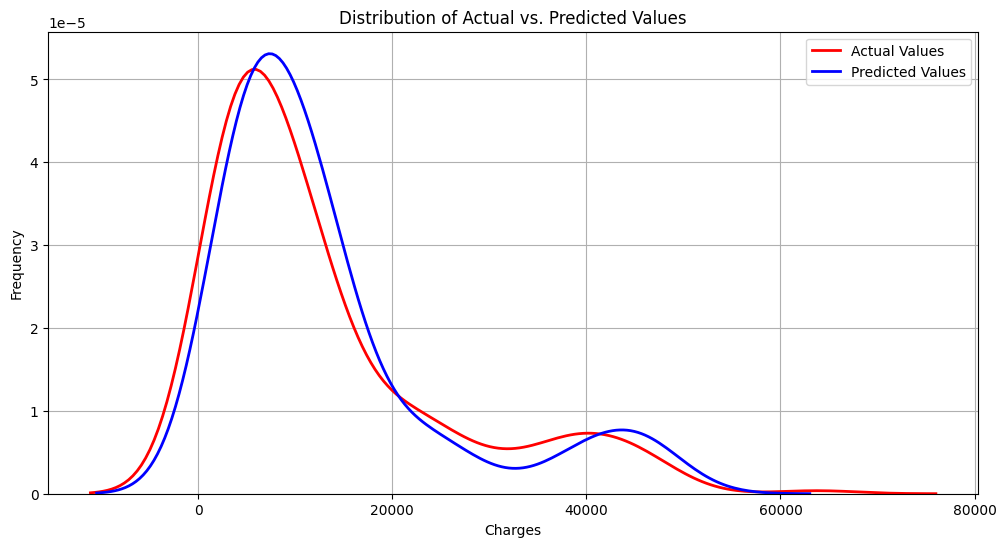

In [121]:
plt.figure(figsize=(12, 6))

# Plotting the KDE of actual values
sns.kdeplot(y_test, color='r', label='Actual Values', linewidth=2)

# Plotting the KDE of predicted values
sns.kdeplot(y_pred_test, color='b', label='Predicted Values', linewidth=2)

# Adding labels and title
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Decision Tree

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# Evaluate the model
print(f'Training MSE: {mean_squared_error(y_train, y_pred_train)}')
print(f'Training R^2: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_pred_test)}')
print(f'Test R^2: {r2_score(y_test, y_pred_test)}')

Training MSE: 244239.5543823394
Training R^2: 0.9983078124756305
Test MSE: 49003243.60682007
Test R^2: 0.6843565603663775


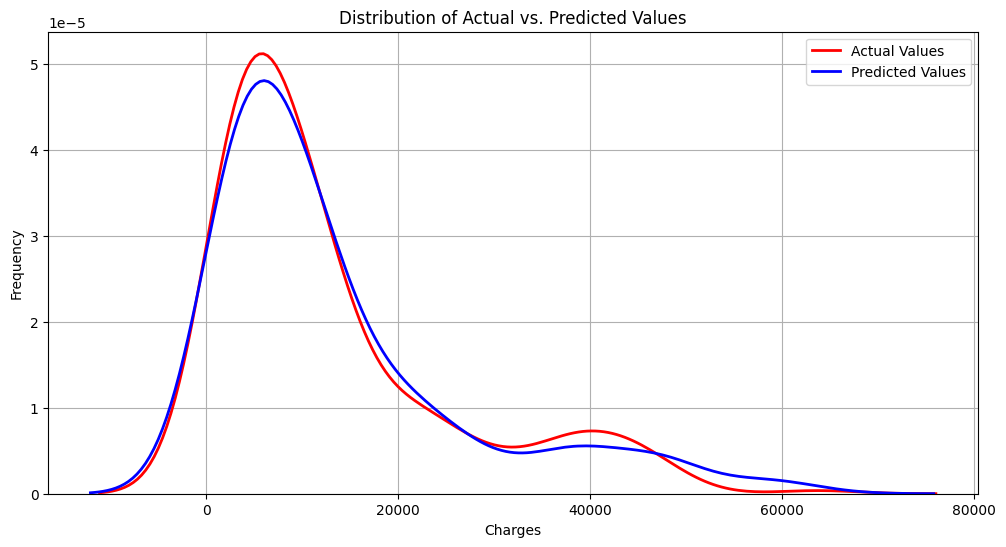

In [124]:
plt.figure(figsize=(12, 6))

# Plotting the KDE of actual values
sns.kdeplot(y_test, color='r', label='Actual Values', linewidth=2)

# Plotting the KDE of predicted values
sns.kdeplot(y_pred_test, color='b', label='Predicted Values', linewidth=2)

# Adding labels and title
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Polynomial Regression

In [125]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [126]:
# Initialize Polynomial Features
poly = PolynomialFeatures(degree=2) 

# Create a pipeline that first transforms the data, then applies linear regression
pipeline = Pipeline([
    ('poly', poly),
    ('linear', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluate the model
print(f'Training MSE: {mean_squared_error(y_train, y_pred_train)}')
print(f'Training R^2: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_pred_test)}')
print(f'Test R^2: {r2_score(y_test, y_pred_test)}')

Training MSE: 23468410.545391146
Training R^2: 0.8374016377399494
Test MSE: 20970715.271709584
Test R^2: 0.8649218253173243


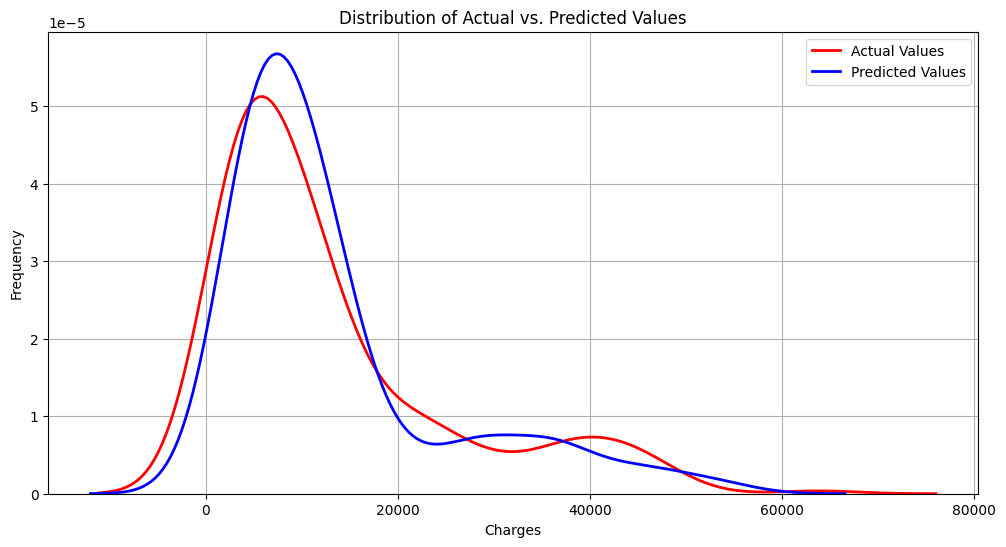

In [127]:
plt.figure(figsize=(12, 6))

# Plotting the KDE of actual values
sns.kdeplot(y_test, color='r', label='Actual Values', linewidth=2)

# Plotting the KDE of predicted values
sns.kdeplot(y_pred_test, color='b', label='Predicted Values', linewidth=2)

# Adding labels and title
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Comparing Predictive Models

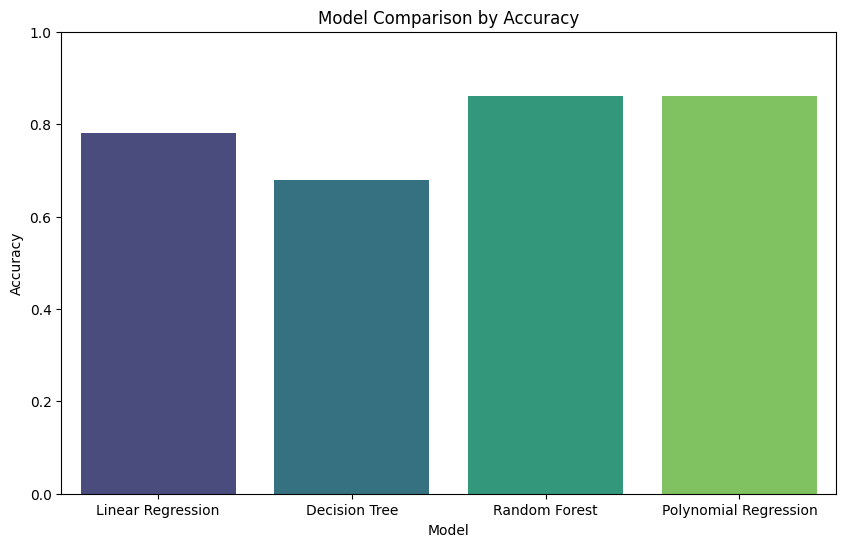

In [128]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Polynomial Regression'],
    'Accuracy': [0.78, 0.68, 0.86, 0.86]}

result_data = pd.DataFrame(results)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=result_data, palette='viridis')
plt.title('Model Comparison by Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.show()

## Conclusion

- Polynomial shows high accuracy on test data where decision tree shows lowest
- Its better to go with either Random Forest or Polynomial Regression